In [45]:
import pandas as pd;
import numpy as np;
from sklearn.metrics import silhouette_samples as ss
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import itertools 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [46]:
# Load dataset (replace with your actual data loading method)
survey_df = pd.read_csv("../../data/final_survey_table.csv", low_memory=False)

In [47]:
survey_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,income_category
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years,T20
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years,B40
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years,M40
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years,T20
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years,B40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,Local development environments,3-5 years,Python,Never,2-3 years,B40
7795,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,We are exploring ML methods (and may one day p...,"5,000-7,499",$100-$999,Local development environments,1-2 years,Python,Never,1-2 years,M40
7796,25-29,Male,China,I prefer not to answer,Data Engineer,Mid-Large,5-9,"We recently started using ML methods (i.e., mo...","20,000-24,999",$100-$999,Local development environments,1-2 years,Python,Used TPU,1-2 years,M40
7797,25-29,Male,Australia,Bachelor’s degree,Other,Large,5-9,No (we do not use ML methods),"60,000-69,999","$10,000-$99,999",Local development environments,3-5 years,Python,Never,1-2 years,T20


In [48]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 16 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   What is your age (# years)?                                                                                                        7799 non-null   object
 1   What is your gender?                                                                                                               7799 non-null   object
 2   In which country do you currently reside?                                                                                          7799 non-null   object
 3   What is the highest level of formal education that you have attained or plan to attain within

In [49]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import NearestNeighbors
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# df = pd.read_csv('../../data/final_survey_table.csv')  # Replace with your dataset path
# df = df.drop_duplicates()  # Remove duplicate rows

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18444\1522803964.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


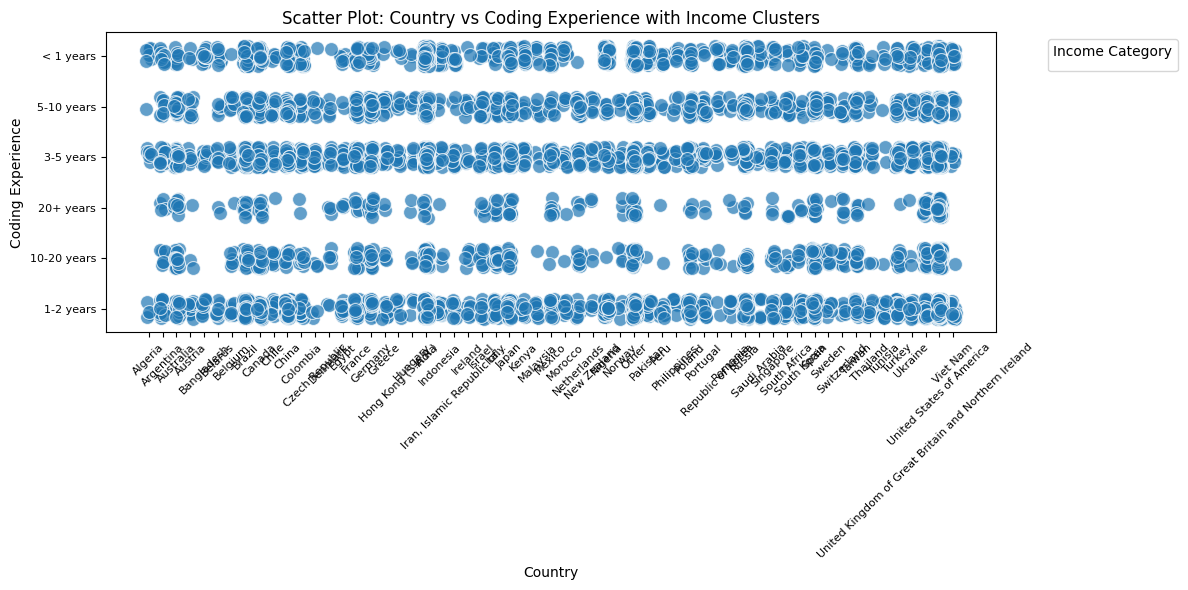

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Coding_Experience_Encoded'] = survey_df['How long have you been writing code to analyze data (at work or at school)?'].astype('category').cat.codes

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Coding_Experience_Jittered'] = jitter(survey_df['Coding_Experience_Encoded'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Coding_Experience_Jittered'],
    # hue=df['income_category'],  # Color by income category
    palette='coolwarm',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Coding Experience with Income Clusters')
plt.xlabel('Country')
plt.ylabel('Coding Experience')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=45, fontsize=8)
ytick_locs = survey_df['Coding_Experience_Encoded'].unique()
ytick_labels = survey_df['How long have you been writing code to analyze data (at work or at school)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18444\771259994.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


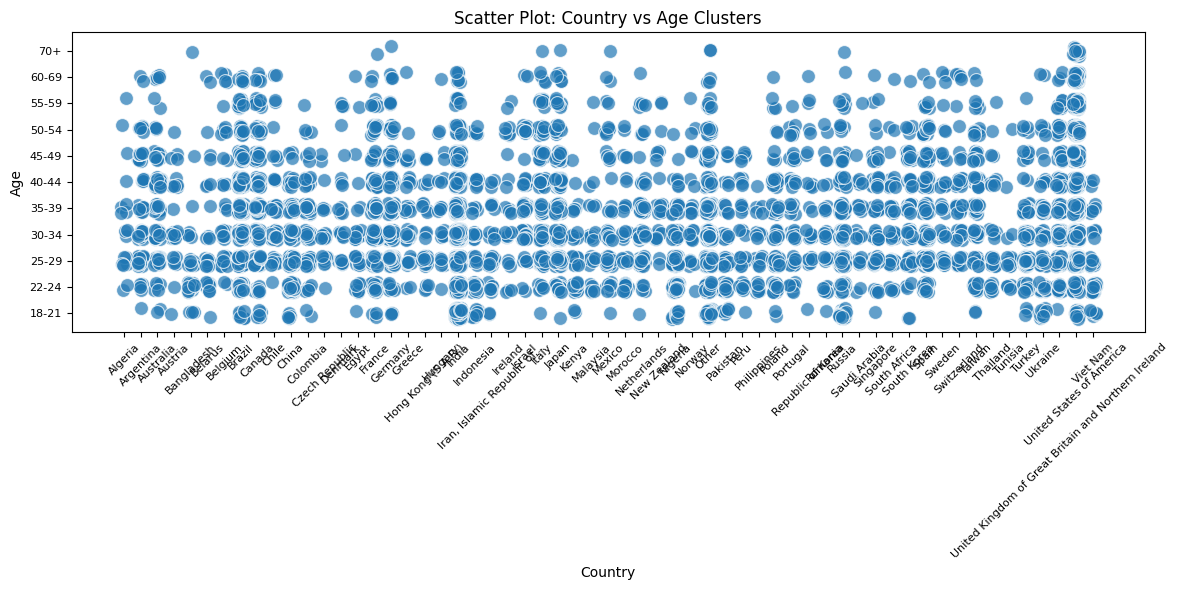

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Age_Encoded'] = survey_df['What is your age (# years)?'].astype('category').cat.codes

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Age_Jittered'] = jitter(survey_df['Age_Encoded'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Age_Jittered'],
    # hue=df['income_category'],  # Color by income category
    palette='coolwarm',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Age Clusters')
plt.xlabel('Country')
plt.ylabel('Age')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=45, fontsize=8)
ytick_locs = survey_df['Age_Encoded'].unique()
ytick_labels = survey_df['What is your age (# years)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
# plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

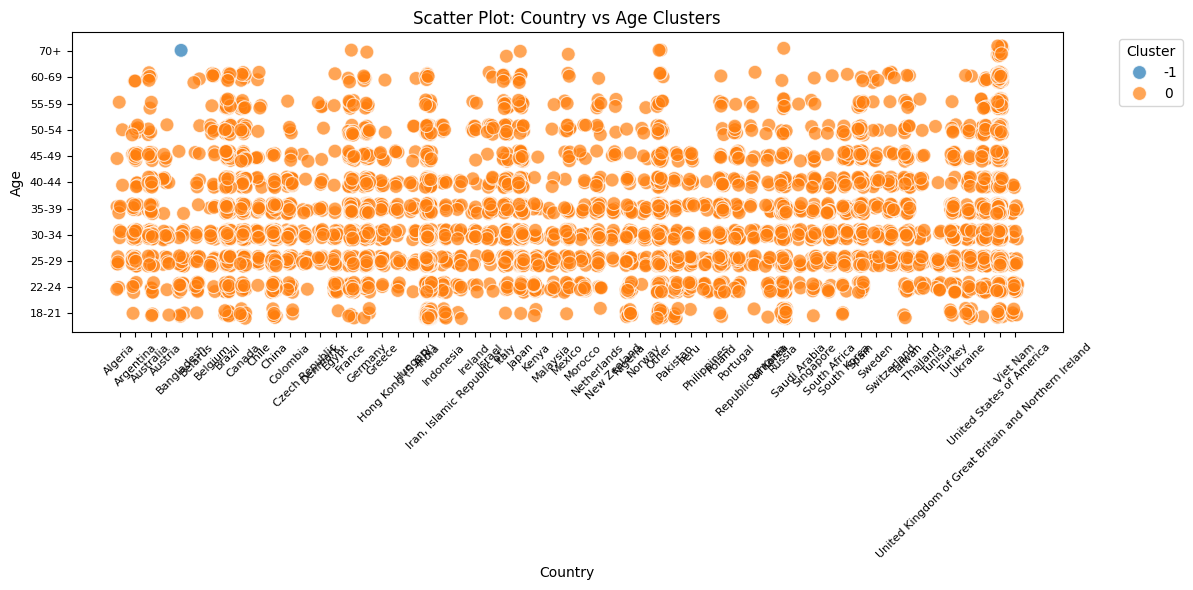

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Age_Encoded'] = survey_df['What is your age (# years)?'].astype('category').cat.codes

# Prepare the features for clustering
features = survey_df[['Country_Encoded', 'Age_Encoded']].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
survey_df['Cluster'] = dbscan.fit_predict(features_scaled)

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Age_Jittered'] = jitter(survey_df['Age_Encoded'])

# Create the scatter plot with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Age_Jittered'],
    hue=survey_df['Cluster'],  # Color by cluster
    palette='tab10',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Age Clusters')
plt.xlabel('Country')
plt.ylabel('Age')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=45, fontsize=8)
ytick_locs = survey_df['Age_Encoded'].unique()
ytick_labels = survey_df['What is your age (# years)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


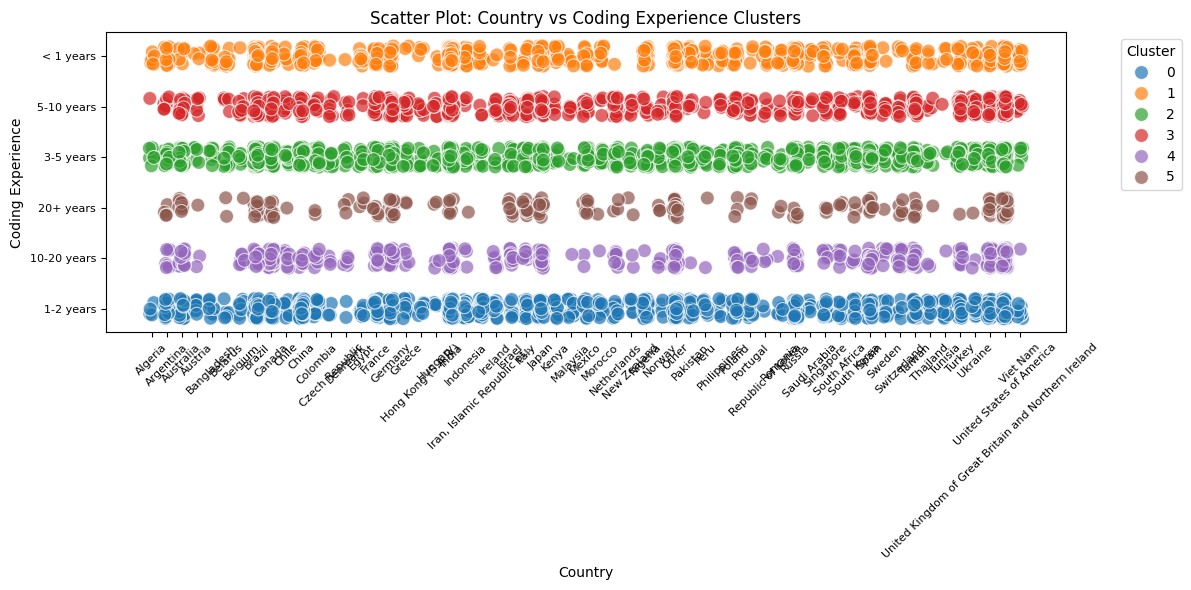

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Coding_Experience_Encoded'] = survey_df['How long have you been writing code to analyze data (at work or at school)?'].astype('category').cat.codes

# Prepare the features for clustering
features = survey_df[['Country_Encoded', 'Coding_Experience_Encoded']].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
survey_df['Cluster'] = dbscan.fit_predict(features_scaled)

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Coding_Experience_Jittered'] = jitter(survey_df['Coding_Experience_Encoded'])

# Create the scatter plot with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Coding_Experience_Jittered'],
    hue=survey_df['Cluster'],  # Color by cluster
    palette='tab10',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Coding Experience Clusters')
plt.xlabel('Country')
plt.ylabel('Coding Experience')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=45, fontsize=8)
ytick_locs = survey_df['Coding_Experience_Encoded'].unique()
ytick_labels = survey_df['How long have you been writing code to analyze data (at work or at school)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [52]:
# Prepare jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Coding_Experience_Encoded'] = survey_df['How long have you been writing code to analyze data (at work or at school)?'].astype('category').cat.codes

# Add jitter for better visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Coding_Experience_Jittered'] = jitter(survey_df['Coding_Experience_Encoded'])

# Combine features for DBSCAN
data = survey_df[['Country_Encoded', 'Coding_Experience_Encoded']].values

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(survey_df[['Country_Encoded', 'Coding_Experience_Encoded']])
encoded_data

<7799x65 sparse matrix of type '<class 'numpy.float64'>'
	with 15598 stored elements in Compressed Sparse Row format>

In [54]:
# # Encode categorical variable (Country)
# data['Country'] = data['Country'].astype('category').cat.codes
# data['Coding_Experience'] = data['Coding_Experience'].astype('category').cat.codes

# # Scale the data
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

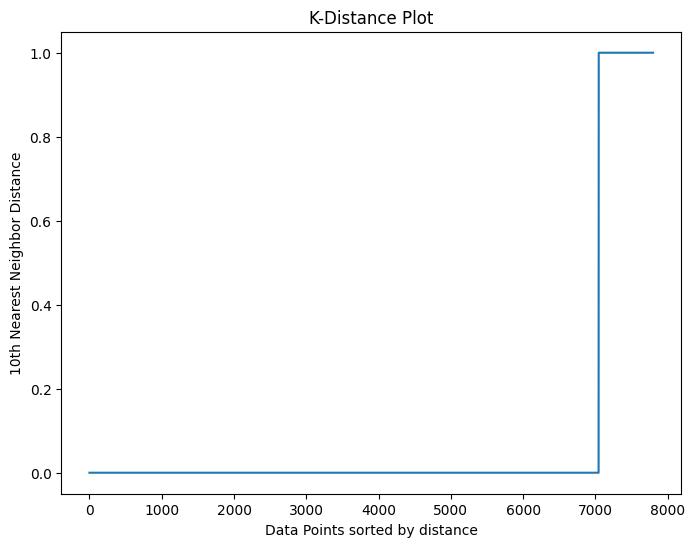

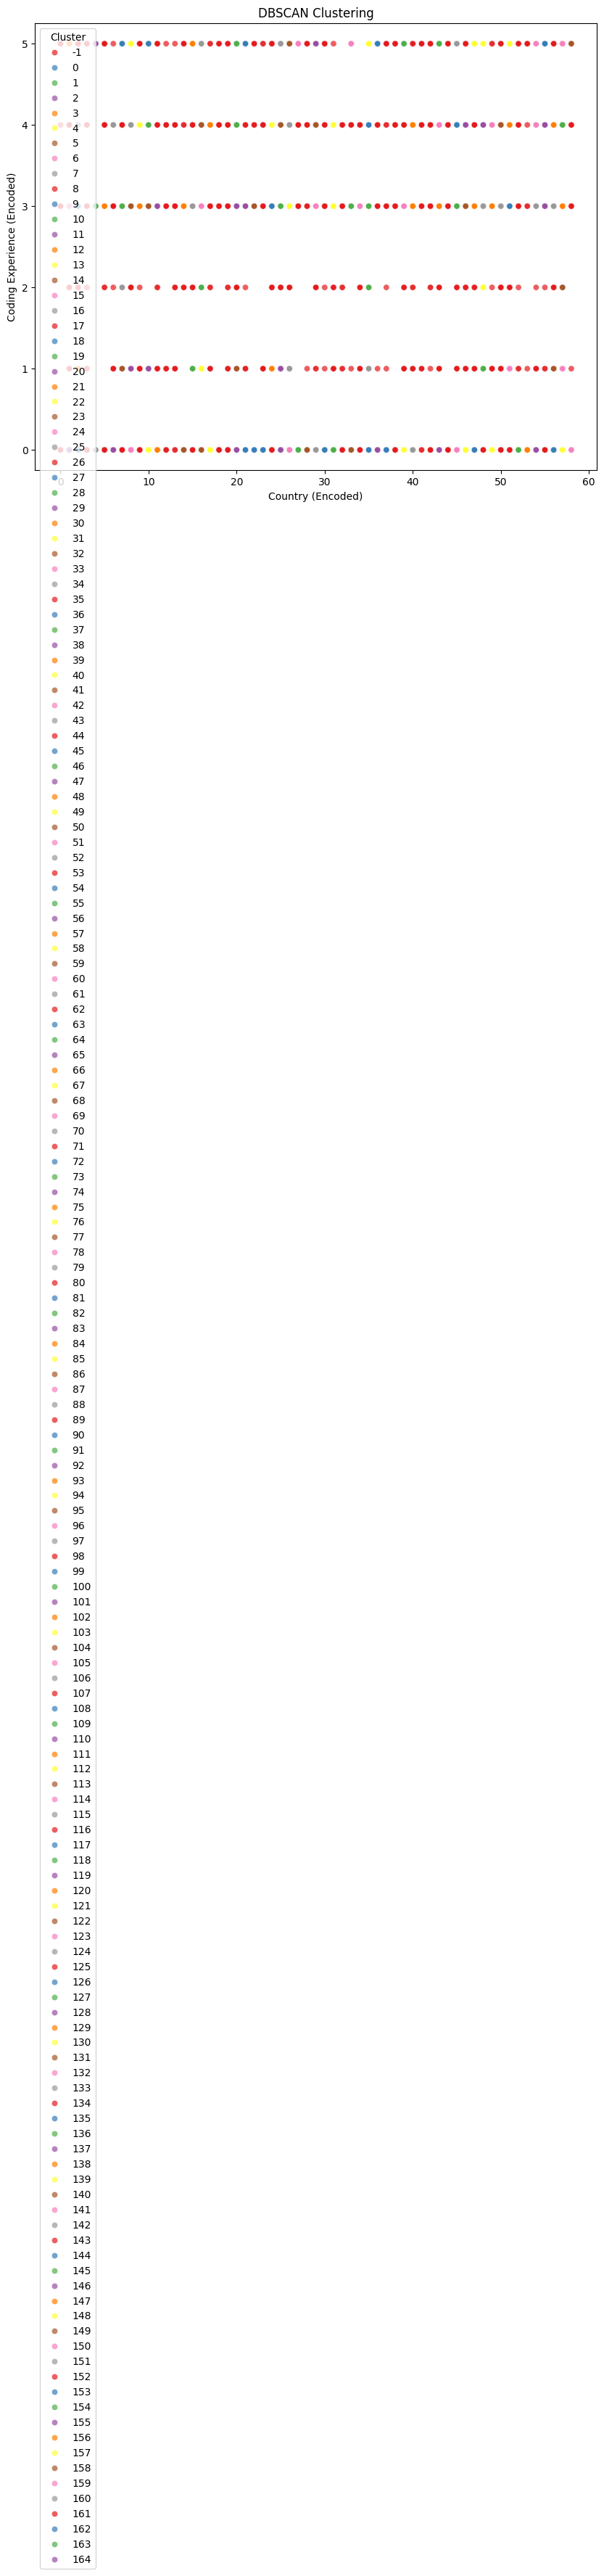

Outliers detected:
      Country_Encoded  Coding_Experience_Encoded  Cluster
66                 12                          0       -1
83                 18                          3       -1
122                19                          3       -1
123                 5                          4       -1
131                11                          1       -1
...               ...                        ...      ...
7758               13                          3       -1
7763               19                          3       -1
7768               50                          0       -1
7769               53                          5       -1
7792               44                          4       -1

[754 rows x 3 columns]


In [ ]:
# # Determine suitable value for eps using k-distance plot
# neighbors = NearestNeighbors(n_neighbors=15)
# neighbors_fit = neighbors.fit(data)
# distances, indices = neighbors_fit.kneighbors(data)

# # Sort distances for elbow method
# distances = np.sort(distances[:, 9], axis=0)
# plt.figure(figsize=(8, 6))
# plt.plot(distances)
# plt.title('K-Distance Plot')
# plt.xlabel('Data Points sorted by distance')
# plt.ylabel('10th Nearest Neighbor Distance')
# plt.show()

# # Perform DBSCAN clustering
# dbscan = DBSCAN(eps=0.5, min_samples=10)  # Adjust eps based on the elbow plot
# clusters = dbscan.fit_predict(data)

# # Convert data back to DataFrame for adding Cluster labels
# data_df = pd.DataFrame(data, columns=['Country_Encoded', 'Coding_Experience_Encoded'])
# data_df['Cluster'] = clusters

# # Visualize the clusters
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=data_df['Country_Encoded'], 
#                 y=data_df['Coding_Experience_Encoded'], 
#                 hue=data_df['Cluster'], 
#                 palette='Set1', 
#                 alpha=0.7)
# plt.title('DBSCAN Clustering')
# plt.xlabel('Country (Encoded)')
# plt.ylabel('Coding Experience (Encoded)')
# plt.legend(title='Cluster')
# plt.show()

# # Identify outliers (Cluster -1 indicates noise)
# outliers = data_df[data_df['Cluster'] == -1]
# print("Outliers detected:")
# print(outliers)

In [56]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [57]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [58]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [59]:
N = len(combinations)
N

90

In [60]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import numpy as np

def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, num_samples) in enumerate(combinations):
        # Fit DBSCAN with Hamming distance
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1

        # Skip combinations with fewer than 2 clusters or more than 50 clusters
        if (num_clusters < 2) or (num_clusters > 50):
            print(f"Combination {(eps, num_samples)} on iteration {i+1} of {len(combinations)} has {num_clusters} clusters. Skipping.")
            scores.append(-10)  # Assign a low score to skip this combination
            all_labels_list.append(labels)
            continue

        # Compute silhouette score only if there are at least 2 clusters
        try:
            score = ss(X, labels, metric='hamming')
            scores.append(score)
            all_labels_list.append(labels)
            print(f"Index: {i}, Score: {scores[-1]}, NumClusters: {num_clusters}")
        except ValueError as e:
            print(f"Silhouette score computation failed for combination {(eps, num_samples)}: {e}")
            scores.append(-10)  # Assign a low score to failed combinations
            all_labels_list.append(labels)

    # Find the best parameters
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {
        'best_epsilon': best_parameters[0],
        'best_min_samples': best_parameters[1],
        'best_labels': best_labels,
        'best_score': best_score
    }

# Call the function with combinations and data
best_dict = get_scores_and_labels(combinations, encoded_data)

Combination (0.01, 2) on iteration 1 of 90 has 302 clusters. Skipping.
Combination (0.01, 5) on iteration 2 of 90 has 246 clusters. Skipping.
Combination (0.01, 8) on iteration 3 of 90 has 195 clusters. Skipping.
Combination (0.01, 11) on iteration 4 of 90 has 147 clusters. Skipping.
Combination (0.01, 14) on iteration 5 of 90 has 123 clusters. Skipping.
Combination (0.01, 17) on iteration 6 of 90 has 95 clusters. Skipping.
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 302 clusters. Skipping.
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 246 clusters. Skipping.
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 195 clusters. Skipping.
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 147 clusters. Skipping.
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 123 clusters. Skipping.
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 95 clusters. Skipping.
Combination (0.15142857142857144, 2) on iteration 1

In [61]:
best_dict

{'best_epsilon': 0.01,
 'best_min_samples': 2,
 'best_labels': array([  0,   1,   2, ..., 221, 173,   7], dtype=int64),
 'best_score': -10}

In [62]:
best_dict['best_labels']

array([  0,   1,   2, ..., 221, 173,   7], dtype=int64)

In [63]:
import pandas as pd

# Convert data to DataFrame if it's a NumPy array
if isinstance(data, np.ndarray):
    data = pd.DataFrame(data)

# Check the dimensions
print("Number of rows in data:", data.shape[0])
print("Number of labels:", len(best_dict['best_labels']))

# Assign cluster labels
if len(best_dict['best_labels']) == data.shape[0]:
    data['cluster'] = best_dict['best_labels']
else:
    raise ValueError("Mismatch between data rows and label length!")

# Proceed with further processing
print(data['cluster'].value_counts())

# Example for encoding categorical variables (if they exist as DataFrame columns)
if 'Country' in data.columns:
    data['Country'] = data['Country'].astype('category').cat.codes
if 'Coding_Experience' in data.columns:
    data['Coding_Experience'] = data['Coding_Experience'].astype('category').cat.codes


Number of rows in data: 7799
Number of labels: 7799
cluster
20     514
2      406
1      384
3      363
10     312
      ... 
244      2
163      2
167      2
205      2
301      2
Name: count, Length: 303, dtype: int64


In [64]:
data['cluster']

0         0
1         1
2         2
3         3
4         4
       ... 
7794      2
7795     46
7796    221
7797    173
7798      7
Name: cluster, Length: 7799, dtype: int64

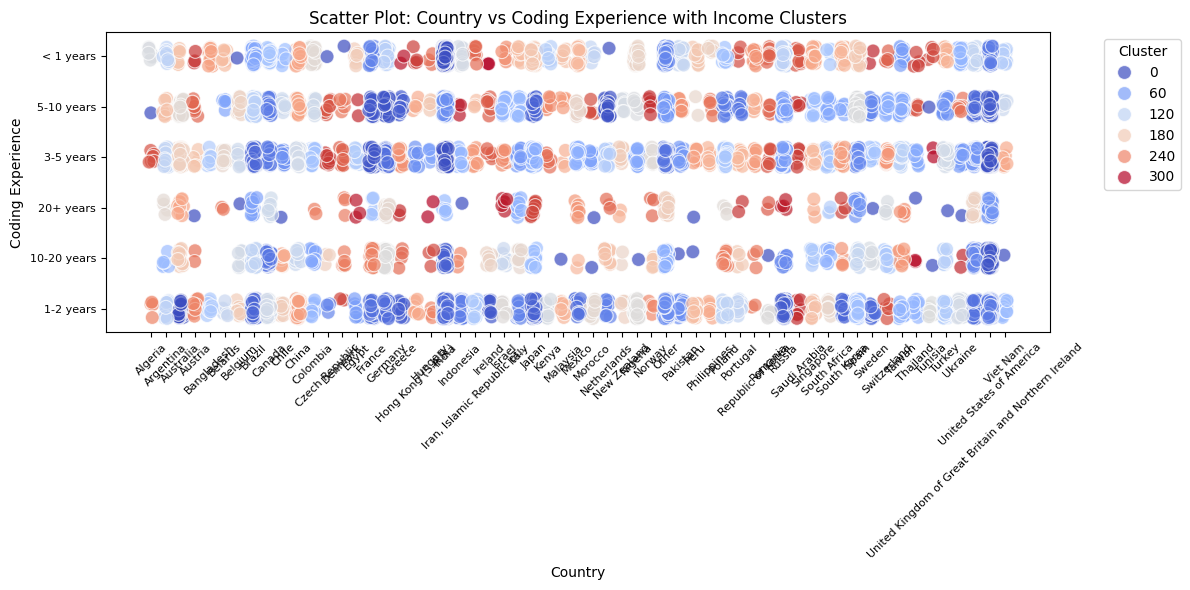

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate jittered data
survey_df['Country_Encoded'] = survey_df['In which country do you currently reside?'].astype('category').cat.codes
survey_df['Coding_Experience_Encoded'] = survey_df['How long have you been writing code to analyze data (at work or at school)?'].astype('category').cat.codes

# Add jitter for better scatter visualization
jitter = lambda x: x + np.random.uniform(-0.2, 0.2, len(x))
survey_df['Country_Jittered'] = jitter(survey_df['Country_Encoded'])
survey_df['Coding_Experience_Jittered'] = jitter(survey_df['Coding_Experience_Encoded'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=survey_df['Country_Jittered'],
    y=survey_df['Coding_Experience_Jittered'],
    hue=data['cluster'],  # Color by income category
    palette='coolwarm',
    s=100,  # Size of points
    alpha=0.7
)

# Format the plot
plt.title('Scatter Plot: Country vs Coding Experience with Income Clusters')
plt.xlabel('Country')
plt.ylabel('Coding Experience')

# Use a smaller subset of labels for xticks and yticks
xtick_locs = survey_df['Country_Encoded'].unique()
xtick_labels = survey_df['In which country do you currently reside?'].unique()

plt.xticks(xtick_locs, xtick_labels, rotation=45, fontsize=8)
ytick_locs = survey_df['Coding_Experience_Encoded'].unique()
ytick_labels = survey_df['How long have you been writing code to analyze data (at work or at school)?'].unique()

plt.yticks(ytick_locs, ytick_labels, fontsize=8)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_18444\2332219111.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


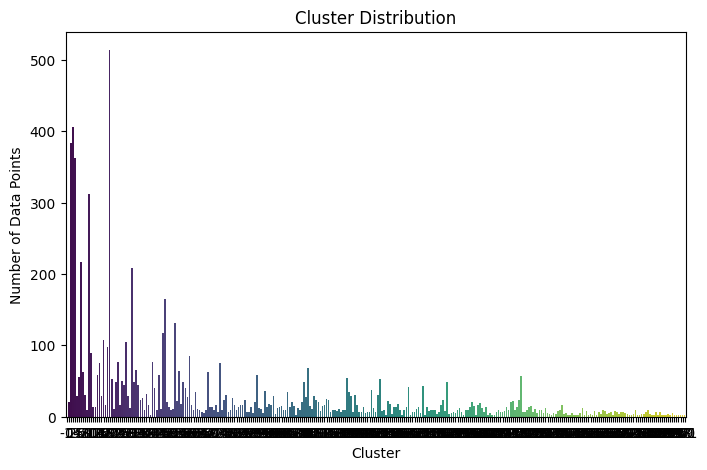

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of data points in each cluster
cluster_counts = data['cluster'].value_counts()

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

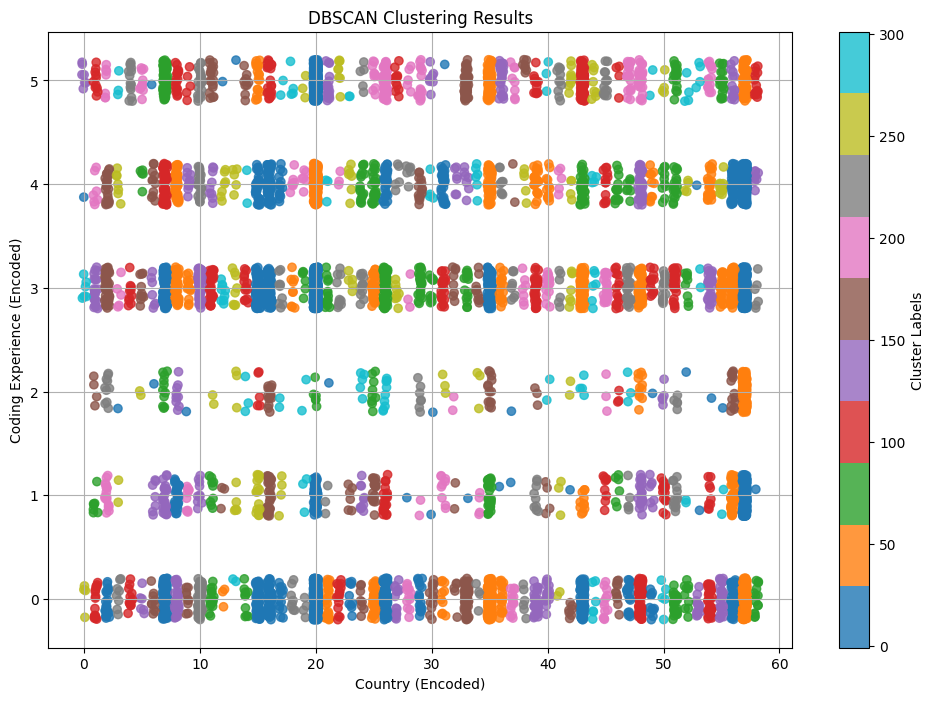

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has the original columns and 'Cluster' column from DBSCAN
# Ensure 'Cluster' column is present in the dataframe
if 'cluster' not in data.columns:
    raise ValueError("Cluster column not found. Make sure DBSCAN results are added to the data.")

# Plot the scatter plot with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=survey_df['Country_Jittered'], 
    y=survey_df['Coding_Experience_Jittered'], 
    c=data['cluster'],  # Use cluster as color
    cmap='tab10',       # Use a categorical colormap
    alpha=0.8           # Adjust transparency
)

# Adding color bar for cluster labels
plt.colorbar(scatter, label='Cluster Labels')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Country (Encoded)')
plt.ylabel('Coding Experience (Encoded)')
plt.grid(True)
plt.show()


In [44]:
from kmodes.kmodes import KModes

# Use K-Modes clustering
kmodes_model = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
labels = kmodes_model.fit_predict(data)

data['Cluster'] = labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 755, cost: 9287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 256, cost: 9549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 198, cost: 9782.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 247, cost: 10400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1072, cost: 8792.0
Best run was number 5


C:\Users\Huawei\AppData\Local\Temp\ipykernel_11236\2829336155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


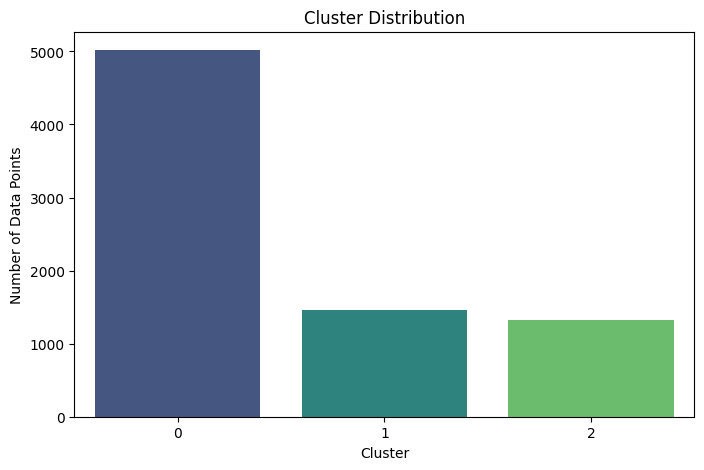

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of data points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


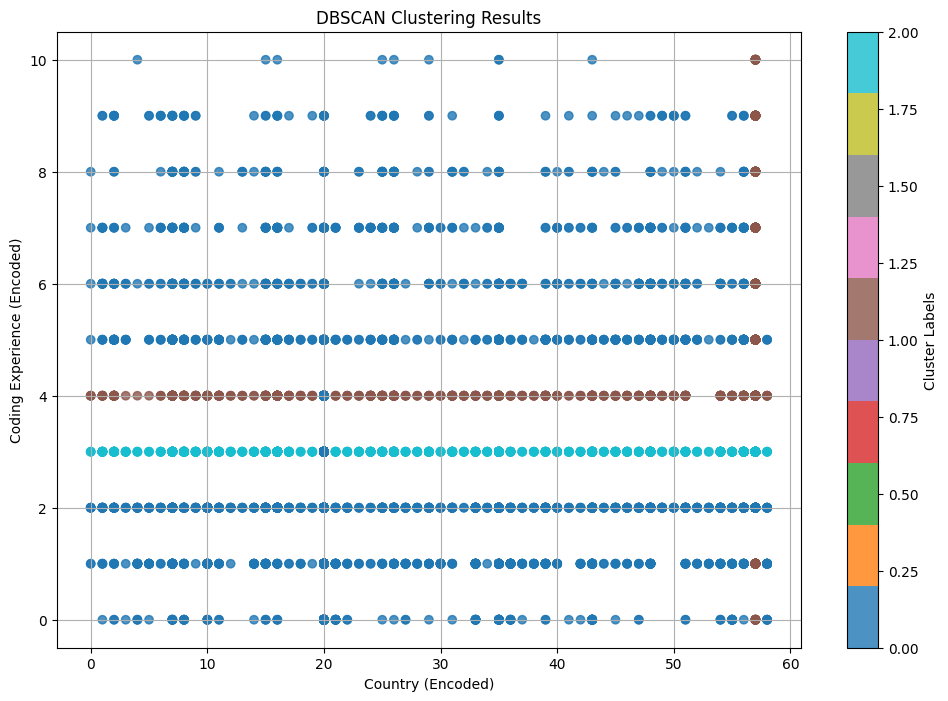

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' has the original columns and 'Cluster' column from DBSCAN
# Ensure 'Cluster' column is present in the dataframe
if 'Cluster' not in data.columns:
    raise ValueError("Cluster column not found. Make sure DBSCAN results are added to the data.")

# Plot the scatter plot with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=survey_df['Country_Jittered'],
    y=survey_df['Coding_Experience_Jittered'],
    c=data['Cluster'],  # Use cluster as color
    cmap='tab10',       # Use a categorical colormap
    alpha=0.8           # Adjust transparency
)

# Adding color bar for cluster labels
plt.colorbar(scatter, label='Cluster Labels')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Country (Encoded)')
plt.ylabel('Coding Experience (Encoded)')
plt.grid(True)
plt.show()


(300, 2)


C:\Users\Huawei\AppData\Local\Temp\ipykernel_18444\386277208.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


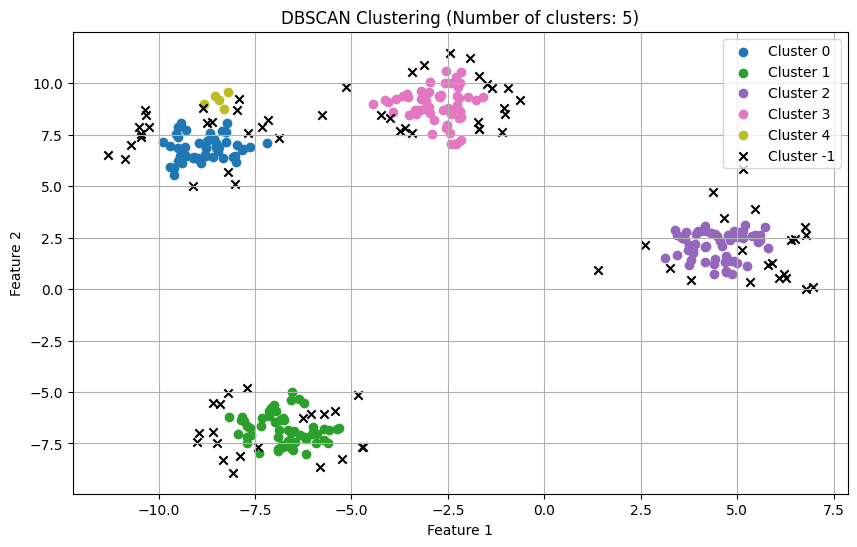

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration
# Replace this with your dataset
n_samples = 300
n_features = 2
centers = 4
# data, _ = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, random_state=42)

# Optional: Load your dataset
# data = pd.read_csv("your_dataset.csv").values

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

# DBSCAN parameters
eps = 0.5  # Maximum distance between two samples for them to be considered in the same neighborhood
min_samples = 5  # Minimum number of points required to form a dense region

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data)
print(data.shape)

# Extract unique clusters
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

# Visualize results
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    if label == -1:
        # Noise points
        color = "k"
        marker = "x"
    else:
        color = colors(label / len(unique_labels))
        marker = "o"

    mask = (labels == label)
    plt.scatter(data[mask, 0], data[mask, 1], label=f"Cluster {label}", color=color, marker=marker)

plt.title(f"DBSCAN Clustering (Number of clusters: {n_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
